Imagine you’re predicting house prices based on a set of features like square footage, number of rooms, and location. A Decision Tree model will:

* Start by looking at all the features and determine, say, "Square footage greater than 2000" is a good initial split, as this divides houses into smaller, more predictable groups.
* Then, within each group (above or below 2000 sqft), it may look at another feature, say, "Number of rooms greater than 3" to further divide the data.
* This process continues, splitting the data into finer and finer groups, until the houses in each group are similar enough in price that predicting an average (or median) for each group gives an accurate estimate.

Key Concepts
* Root Node: This is the top of the tree where the first split happens.
* Decision Nodes: These are points where the tree splits based on the value of a feature (e.g., "Is square footage greater than 2000?").
* Leaf Nodes: These are the end nodes where predictions are made. Each leaf contains a value that represents the predicted outcome for all instances that reach this point.
* Splitting Criterion: The decision to split the data at each node is based on a criterion such as minimizing the mean squared error (MSE) in regression trees.

MSE=  1/n * ∑ (yi − y)**2

### Strengths of Decision Tree Regression:
* Easy to interpret: You can visualize the tree and understand the decisions the model makes at each step.
Handles non-linear data: Decision trees can capture non-linear relationships between features and the target, as it recursively splits the data into smaller subsets.
* Feature importance: It naturally ranks features by how useful they are for making predictions.  


### Weaknesses of Decision Tree Regression:
* Overfitting: If the tree grows too deep, it can overfit the training data, making it sensitive to noise and not generalizing well to new data.
* Unstable: Small changes in the data can result in very different splits and, hence, very different trees.
* Bias toward splits with more levels: Features with many unique values (e.g., continuous features) might dominate the splitting process, even if they are not the most important.

In [1]:
# import numpy package for arrays and stuff 
import numpy as np  
  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# import pandas for importing csv files  
import pandas as pd  

In [2]:
# import dataset 
# dataset = pd.read_csv('Data.csv')  
# alternatively open up .csv file to read data 
  
dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 
  
# print the dataset 
print(dataset)  

[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [3]:
X = dataset[:, 1:2].astype(int)  
  
# print X 
print(X) 

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [4]:
y = dataset[:, 2].astype(int)  
  
# print y 
print(y) 

[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [5]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

In [6]:
# predicting a new value 
  
# test the output by changing values, like 3750 
y_pred = regressor.predict([[3750]]) 
  
# print the predicted price 
print("Predicted price: % d\n"% y_pred)  

Predicted price:  8000



C:\Users\mhdfa\AppData\Local\Temp\ipykernel_19136\3435896675.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price: % d\n"% y_pred)


C:\Users\mhdfa\AppData\Local\Temp\ipykernel_19136\2175169900.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


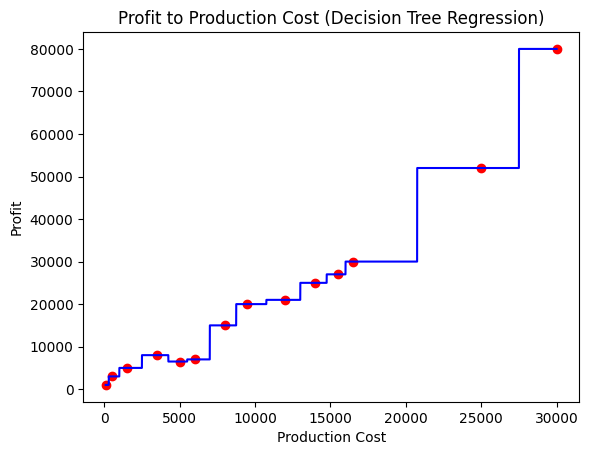

In [7]:
# arange for creating a range of values  
# from min value of X to max value of X  
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 
  
# reshape for reshaping the data into  
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
# scatter plot for original data 
plt.scatter(X, y, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  
  
# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)')  
  
# specify X axis label 
plt.xlabel('Production Cost') 
  
# specify Y axis label 
plt.ylabel('Profit') 
  
# show the plot 
plt.show() 

In [8]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =['Production Cost'])  